# Nikita Kiran More(Batch May 2024)

# EDA_2

# Data Exploration and Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler    

In [3]:
df = pd.read_csv('adult_with_headers.csv')   

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [7]:
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [8]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [10]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [11]:
missing_values = df.isnull().mean().sort_values(ascending=False)
print(missing_values)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64


In [12]:
df = df.drop(columns=missing_values[missing_values > 0.5].index)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [14]:
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].median(), inplace=True)

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [17]:
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df_standard_scaled[numerical_columns])

In [18]:
standard_scaler

StandardScaler()

In [19]:
df_standard_scaled

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


In [20]:
df_standard_scaled[numerical_columns]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [21]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(df_minmax_scaled[numerical_columns])

In [22]:
minmax_scaler

MinMaxScaler()

In [23]:
df_minmax_scaled

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [24]:
df_minmax_scaled[numerical_columns]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [25]:
print(df_standard_scaled.head())
print(df_minmax_scaled.head())

        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0      0.148453      -0.21

# Encoding Techniques

In [26]:
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [27]:
few_category_columns = [col for col in categorical_columns if col in df.columns and df[col].nunique() < 5]

In [28]:
df_one_hot_encoded = pd.get_dummies(df, columns=few_category_columns)
print(df_one_hot_encoded.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0              40   United-States   <=50K   
1             0             0              13   

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
many_category_columns = [col for col in categorical_columns if col in df.columns and df[col].nunique() >= 5]

In [31]:
label_encoders = {}
for col in many_category_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print("DataFrame after Label Encoding:")
print(df.head())

DataFrame after Label Encoding:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1       

# Feature Engineering

In [32]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior', 'Elder'])
df['age_group']

0              Adult
1              Adult
2              Adult
3             Senior
4        Young Adult
            ...     
32556    Young Adult
32557          Adult
32558         Senior
32559    Young Adult
32560         Senior
Name: age_group, Length: 32561, dtype: category
Categories (5, object): ['Child' < 'Young Adult' < 'Adult' < 'Senior' < 'Elder']

In [33]:
df['capital_net_gain'] = df['capital_gain'] - df['capital_loss']
df['capital_net_gain']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_net_gain, Length: 32561, dtype: int64

In [34]:
print(df[['age', 'age_group', 'capital_gain', 'capital_loss', 'capital_net_gain']].head())

   age    age_group  capital_gain  capital_loss  capital_net_gain
0   39        Adult          2174             0              2174
1   50        Adult             0             0                 0
2   38        Adult             0             0                 0
3   53       Senior             0             0                 0
4   28  Young Adult             0             0                 0


In [35]:
df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: log_capital_gain, Length: 32561, dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Log-Transformed Capital Gain Distribution')

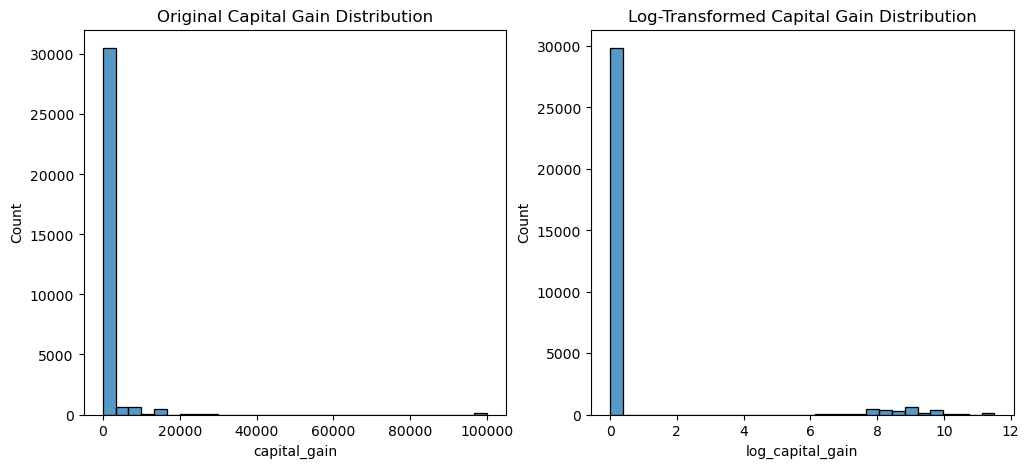

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['capital_gain'], bins=30, ax=ax[0])
ax[0].set_title('Original Capital Gain Distribution')
sns.histplot(df['log_capital_gain'], bins=30, ax=ax[1])
ax[1].set_title('Log-Transformed Capital Gain Distribution')

# Feature Selection

In [43]:
from sklearn.ensemble import IsolationForest

In [46]:
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

In [47]:
pps_matrix = pps.matrix(df)
pps_matrix = pps_matrix[pps_matrix['x'] != pps_matrix['y']]     

In [48]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1,age,workclass,0.000000,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
5,age,marital_status,0.169528,regression,True,mean absolute error,1.174000,0.974974,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
318,log_capital_gain,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,7.756820,DecisionTreeRegressor()
319,log_capital_gain,native_country,0.000000,regression,True,mean absolute error,2.374800,4.234430,DecisionTreeRegressor()
320,log_capital_gain,income,0.297578,classification,True,weighted F1,0.653115,0.756341,DecisionTreeClassifier()
321,log_capital_gain,age_group,0.000000,classification,True,weighted F1,0.318800,0.312408,DecisionTreeClassifier()


In [49]:
print(pps_matrix.sort_values('ppscore', ascending=False).head())

                    x                 y   ppscore            case  \
15                age         age_group  1.000000  classification   
58          education     education_num  1.000000      regression   
75      education_num         education  1.000000      regression   
197      capital_gain  log_capital_gain  0.998032      regression   
305  capital_net_gain  log_capital_gain  0.998032      regression   

     is_valid_score               metric  baseline_score  model_score  \
15             True          weighted F1        0.318800     1.000000   
58             True  mean absolute error        1.853000     0.000000   
75             True  mean absolute error        2.759000     0.000000   
197            True  mean absolute error        0.714858     0.001407   
305            True  mean absolute error        0.714858     0.001407   

                        model  
15   DecisionTreeClassifier()  
58    DecisionTreeRegressor()  
75    DecisionTreeRegressor()  
197   DecisionTree

In [50]:
corr_matrix = df.corr()
print(corr_matrix)     

                       age  workclass    fnlwgt  education  education_num  \
age               1.000000   0.003787 -0.076646  -0.010508       0.036527   
workclass         0.003787   1.000000 -0.016656   0.023513       0.052085   
fnlwgt           -0.076646  -0.016656  1.000000  -0.028145      -0.043195   
education        -0.010508   0.023513 -0.028145   1.000000       0.359153   
education_num     0.036527   0.052085 -0.043195   0.359153       1.000000   
marital_status   -0.266288  -0.064731  0.028153  -0.038407      -0.069304   
occupation       -0.020947   0.254892  0.001597  -0.021260       0.109697   
relationship     -0.263698  -0.090461  0.008931  -0.010876      -0.094153   
race              0.028718   0.049742 -0.021291   0.014131       0.031838   
capital_gain      0.077674   0.033835  0.000432   0.030046       0.122630   
capital_loss      0.057775   0.012216 -0.010252   0.016746       0.079923   
hours_per_week    0.068756   0.138962 -0.018768   0.055510       0.148123   